# Исходные данные
Датасет: https://www.openml.org/d/44

Предметная область: спам в электронной рассылке.
Задача: определить, является ли электронное письмо спамом.
Записей: 4601, атрибутов: 57.

## Атрибуты:
1.	Частота использования строки «make» (вещественный тип, [0,100])
2.	Частота использования строки «address» (вещественный тип, [0,100])
3.	Частота использования строки «all» (вещественный тип, [0,100])
4.	Частота использования строки «3d» (вещественный тип, [0,100])
5.	Частота использования строки «our» (вещественный тип, [0,100])
6.	Частота использования строки «over» (вещественный тип, [0,100])
7.	Частота использования строки «remove» (вещественный тип, [0,100])
8.	Частота использования строки «internet» (вещественный тип, [0,100])
9.	Частота использования строки «order» (вещественный тип, [0,100])
10.	Частота использования строки «mail» (вещественный тип, [0,100])
11.	Частота использования строки «receive» (вещественный тип, [0,100])
12.	Частота использования строки «will» (вещественный тип, [0,100])
13.	Частота использования строки «people» (вещественный тип, [0,100])
14.	Частота использования строки «report» (вещественный тип, [0,100])
15.	Частота использования строки «addresses» (вещественный тип, [0,100])
16.	Частота использования строки «free» (вещественный тип, [0,100])
17.	Частота использования строки «business» (вещественный тип, [0,100])
18.	Частота использования строки «email» (вещественный тип, [0,100])
19.	Частота использования строки «you» (вещественный тип, [0,100])
20.	Частота использования строки «credit» (вещественный тип, [0,100])
21.	Частота использования строки «your» (вещественный тип, [0,100])
22.	Частота использования строки «font» (вещественный тип, [0,100])
23.	Частота использования строки «000» (вещественный тип, [0,100])
24.	Частота использования строки «money» (вещественный тип, [0,100])
25.	Частота использования строки «hp» (вещественный тип, [0,100])
26.	Частота использования строки «hpl» (вещественный тип, [0,100])
27.	Частота использования строки «george» (вещественный тип, [0,100])
28.	Частота использования строки «650» (вещественный тип, [0,100])
29.	Частота использования строки «lab» (вещественный тип, [0,100])
30.	Частота использования строки «labs» (вещественный тип, [0,100])
31.	Частота использования строки «telnet» (вещественный тип, [0,100])
32.	Частота использования строки «857» (вещественный тип, [0,100])
33.	Частота использования строки «data» (вещественный тип, [0,100])
34.	Частота использования строки «415» (вещественный тип, [0,100])
35.	Частота использования строки «85» (вещественный тип, [0,100])
36.	Частота использования строки «technology» (вещественный тип, [0,100])
37.	Частота использования строки «1999» (вещественный тип, [0,100])
38.	Частота использования строки «parts» (вещественный тип, [0,100])
39.	Частота использования строки «pm» (вещественный тип, [0,100])
40.	Частота использования строки «direct» (вещественный тип, [0,100])
41.	Частота использования строки «cs» (вещественный тип, [0,100])
42.	Частота использования строки «meeting» (вещественный тип, [0,100])
43.	Частота использования строки «original» (вещественный тип, [0,100])
44.	Частота использования строки «project» (вещественный тип, [0,100])
45.	Частота использования строки «re» (вещественный тип, [0,100])
46.	Частота использования строки «edu» (вещественный тип, [0,100])
47.	Частота использования строки «table» (вещественный тип, [0,100])
48.	Частота использования строки «conference» (вещественный тип, [0,100])
49.	Частота использования символа “<” (вещественный тип, [0,100])
50.	Частота использования символа “(” (вещественный тип, [0,100])
51.	Частота использования символа “[” (вещественный тип, [0,100])
52.	Частота использования символа “!” (вещественный тип, [0,100])
53.	Частота использования символа “$” (вещественный тип, [0,100])
54.	Частота использования символа “#” (вещественный тип, [0,100])
55.	Средняя длина непрерывной последовательности заглавных букв (вещественный тип, [1, …])
56.	Самая длинная непрерывная последовательность заглавных букв (целый тип, [1, …])
57.	Сумма длин всех непрерывных последовательностей заглавных букв (целый тип, [1, …])

## Классы:
0 – не спам, 1 – спам.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
# Загрузка данных из файла
data = pd.read_csv('data/spambase.data', header = None).values
# Разделение на классы и атрибуты
attributes = data[:, :-1]
classes = np.ravel(data[:, -1:].astype(np.int64, copy=False))
# Выделение обучающей и тестовой выборки
x_train, x_test, y_train, y_test = train_test_split(
    attributes, classes, test_size=0.3, random_state=42)

# Визуализация двух признаков и коэффициент корреляции между ними
Определяется корреляция между частотой использования знака "$" и частотой использования комбинации нулей "000".

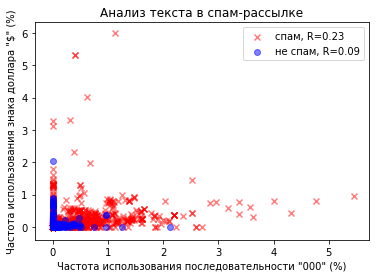

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

count = int(len(attributes)) # сколько берётся записей
for c,marker,color in zip((1, 0), ('x', 'o'), ('red', 'blue')):
    a1 = [attributes[i][22] for i in range(count) if classes[i] == c]
    a2 = [attributes[i][52] for i in range(count) if classes[i] == c]
    R = pearsonr(a1, a2)
    label = 'спам' if c == 1 else 'не спам'
    plt.scatter(x=a1, y=a2, marker=marker, color=color, alpha=0.5,
               label='{:}, R={:.2f}'.format(label, R[0]))

    
# Отрисовка данных
plt.title('Анализ текста в спам-рассылке')
plt.xlabel('Частота использования последовательности "000" (%)')
plt.ylabel('Частота использования знака доллара "$" (%)')
plt.legend(loc='upper right')
plt.show()

# Разбиение классов с использованием LDA
Поскольку для разбиения имеется лишь два класса ("спам" и "не спам"), при трансформации LDA получается одномерный вектор признаков.

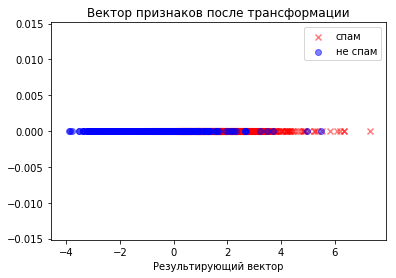

In [4]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
trans = lda.fit(x_train, y_train).transform(x_train)
for c,marker,color in zip((1, 0), ('x', 'o'), ('red', 'blue')):
    x = [trans[i] for i in range(len(trans)) if y_train[i] == c]
    y = [0 for i in range(len(x))]
    label = 'спам' if c == 1 else 'не спам'
    plt.scatter(x=x, y=y, marker=marker, color=color, alpha=0.5,
               label=label)
    
plt.title('Вектор признаков после трансформации')
plt.xlabel('Результирующий вектор')
plt.legend(loc='upper right')
plt.show()

# Классификация с использованием LDA и QDA

In [5]:
# Обучение и тестирование
print('Точность LDA: {:.2f}'.format(lda.score(x_test, y_test)))
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
print('Точность QDA: {:.2f}'.format(qda.score(x_test, y_test)))

Точность LDA: 0.89
Точность QDA: 0.82


# Вывод
В ходе работы была выявлена корреляция между использованием в тексте спам-рассылки знака "$" и последовательности нулей "000". При рассмотрении спама коэффициент корреляции оказался намного больше (0,23) чем при рассмотрении обычных писем (0,09). Визуализация вектора признаков, полученного с помощью LDA, чётко демонстрирует разделение на классы с некоторой погрешностью.
При классификации тестовой выборки с использованием методов LDA и QDA лучшую точность продемонстрировал LDA.